# Lab 8: Define and Solve an ML Problem of Your Choosing

In [26]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [27]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename, header=0)

df.head(5)

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I have chosen the Book Reviews data set. I will be predicting if a given book review is positive or negative. The label is Positive Review. This is a supervised binary classification problem. Because this is a NLP, there is only one feature column, 'Review'. This problem is important because it reduces the need to manually read and analyze each review. This automation can help in many ways, but especially in getting quicker feedback about the book from the target audience and/or customers.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

To prepare the data, I will check if there are any missing values. With this dataset and the defined problem, finding/replacing outliers, renaming features/labels, etc. do not apply. Instead, I will check for a class imbalance, and preprocess the data by transforming text into numerical features using word embeddings.

#### Check for any null values in the dataframe

In [28]:
df.isnull().values.any()

False

Since there are no null values in the dataframe, we can proceed to checking for a class imbalance.

#### Check for Class Imbalance

Text(0.5, 1.0, 'Barplot of Label Distribution Between Classes')

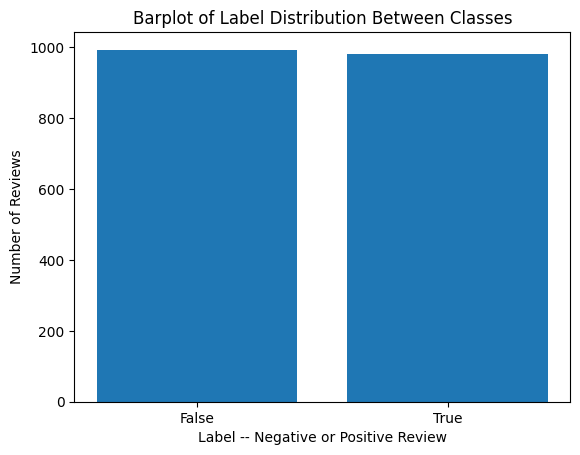

In [29]:
x_axis=['False', 'True']
y_axis = df['Positive Review'].value_counts()
plt.bar(x_axis, y_axis)
plt.xlabel('Label -- Negative or Positive Review')
plt.ylabel('Number of Reviews')
plt.title('Barplot of Label Distribution Between Classes')

The classes are well balanced. The `False` label indicates a Negative review (it is false that the reveiw is Positive) and the `True` label indicates a Positive review.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

This is a binary classification NLP ML problem, so there is only one feature column, 'Review'. To prepare the data, I will first split it into training and testing sets, and then transform the data to numerical features using word embeddings. The model I have chosen is a Logistic Regression. I will construct the model using the LogisticRegression model object from Scikit Learn. I will analyze and improve its performance by iteratively testing different values for hyperparameter c. I will then use the best value in the final model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## Data Preparation

#### Creating Labeled Examples 

In [31]:
y = df['Positive Review'] 
X = df['Review']

print(y.shape)
print(X.shape)

(1973,)
(1973,)


#### Preprocessing Text

To transform the text data into numerical features, I will train the Word2Vec model using Gensim.

In [32]:
import gensim

I will preprocess the data using the Gensim simple_prepocess. This step removes stopwords, converts all words to lowercase, and splits the text into smaller segments.

In [33]:
X_original = X
X = X.apply(lambda row: gensim.utils.simple_preprocess(row))

#### Creating Testing and Training Sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1234)

X_train.head()

1369    [as, my, brother, said, when, flipping, throug...
1366    [cooper, book, is, yet, another, warm, and, fu...
385     [have, many, robot, books, and, this, is, the,...
750     [as, china, re, emerges, as, dominant, power, ...
643     [have, been, huge, fan, of, michael, crichton,...
Name: Review, dtype: object

#### Training the Word2Vec Model

I will use X_train to train the Word2Vec Model.

In [35]:
word2vec_model = gensim.models.Word2Vec(X_train, vector_size=100, window=4, min_count=2)

In [36]:
vocabulary_size = len(word2vec_model.wv.key_to_index) #size of vocabulary
print(vocabulary_size)

10354


#### Creating Feature Vectors

Replacing each word with its feature vector.

In [37]:
words = set(word2vec_model.wv.index_to_key)
#transforming X_train set
X_train_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_train], dtype=object)

#transforming X_test set
X_test_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_test], dtype=object)

Adjusting the vectors so that there is a consistent number of features per example.

In [38]:
X_train_feature_vector = []
for w in X_train_word_embeddings:
    if w.size:
        X_train_feature_vector.append(w.mean(axis=0))
    else:
        X_train_feature_vector.append(np.zeros(100, dtype=float))
        
X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(w.mean(axis=0))
    else:
        X_test_feature_vector.append(np.zeros(100, dtype=float))

## Fitting and Evaluating the Logistic Regression Model

The text data has been preprocessed and transformed into numerical features, so we can proceed to constructing the Logistic Regssion model.

#### Creating and Fitting the Model

In [39]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    # model object
    model = LogisticRegression(C=c)
    model.fit(X_train_feature_vector, y_train)

    # make predictions on transformed test data using predict_proba()
    probability_predictions = model.predict_proba(X_test_feature_vector)[:,1]

    # make predictions on transformed test data using predict()
    class_label_predictions = model.predict(X_test_feature_vector)

    # log loss
    l_loss = log_loss(y_test, probability_predictions)
    
    # accuracy
    acc_score = accuracy_score(y_test, class_label_predictions)
    print('Accuracy: ' + str(acc_score))

    return [l_loss, acc_score]

#### Evaluating the Model Using Different Hyperparameters

In [40]:
cs = [10**i for i in range(-10,10)]
for C in cs:
    result = train_test_LR(X_train, y_train, X_test, y_test, c=C)
    print('Log loss and accuracy scores for c: ' + str(C) + ', ' + str(result[1]) + ', ' + str(result[1]))

Accuracy: 0.4962025316455696
Log loss and accuracy scores for c: 1e-10, 0.4962025316455696, 0.4962025316455696
Accuracy: 0.4962025316455696
Log loss and accuracy scores for c: 1e-09, 0.4962025316455696, 0.4962025316455696
Accuracy: 0.4962025316455696
Log loss and accuracy scores for c: 1e-08, 0.4962025316455696, 0.4962025316455696
Accuracy: 0.4962025316455696
Log loss and accuracy scores for c: 1e-07, 0.4962025316455696, 0.4962025316455696
Accuracy: 0.4962025316455696
Log loss and accuracy scores for c: 1e-06, 0.4962025316455696, 0.4962025316455696
Accuracy: 0.4962025316455696
Log loss and accuracy scores for c: 1e-05, 0.4962025316455696, 0.4962025316455696
Accuracy: 0.4962025316455696
Log loss and accuracy scores for c: 0.0001, 0.4962025316455696, 0.4962025316455696
Accuracy: 0.4962025316455696
Log loss and accuracy scores for c: 0.001, 0.4962025316455696, 0.4962025316455696
Accuracy: 0.5974683544303797
Log loss and accuracy scores for c: 0.01, 0.5974683544303797, 0.5974683544303797
A

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Accuracy: 0.6936708860759494
Log loss and accuracy scores for c: 10000, 0.6936708860759494, 0.6936708860759494
Accuracy: 0.660759493670886
Log loss and accuracy scores for c: 100000, 0.660759493670886, 0.660759493670886
Accuracy: 0.7088607594936709
Log loss and accuracy scores for c: 1000000, 0.7088607594936709, 0.7088607594936709
Accuracy: 0.6708860759493671
Log loss and accuracy scores for c: 10000000, 0.6708860759493671, 0.6708860759493671
Accuracy: 0.7240506329113924
Log loss and accuracy scores for c: 100000000, 0.7240506329113924, 0.7240506329113924
Accuracy: 0.6708860759493671
Log loss and accuracy scores for c: 1000000000, 0.6708860759493671, 0.6708860759493671


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

The best hyperparameter for c is 10000000. I will train the final model using hyperparameter c=10000000.

In [41]:
    # model object
    model = LogisticRegression(C=10000000)
    model.fit(X_train_feature_vector, y_train)

    # make predictions on transformed test data using predict_proba()
    probability_predictions = model.predict_proba(X_test_feature_vector)[:,1]

    # make predictions on transformed test data using predict()
    class_label_predictions = model.predict(X_test_feature_vector)

    # log loss
    l_loss = log_loss(y_test, probability_predictions)
    print('Log loss: ' + str(l_loss))

    # accuracy
    acc_score = accuracy_score(y_test, class_label_predictions)
    print('Accuracy: ' + str(acc_score))

Log loss: 0.6006093035927863
Accuracy: 0.6708860759493671


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now we can look at a review from the data set.

In [42]:
print('Review from example #100\n')
print(X_original[100])

print('\nPrediction: Is this review positive? {}\n'.format(class_label_predictions[100])) 

print('Actual: Is this review positive? {}\n'.format(y_test.to_numpy()[100]))

Review from example #100

For those who endeavor to perfect fine art digital printmaking, this is the book to read.  It is a &quot;how to&quot; and so much more.  The book covers paper, ink, techniques, hand coloring and the practical application and intereaction of all of these variables.  The book is cogently written and elegantly displayed.  It is a must for anyone's library who wishes to expand their horizons in the digital printing arena.  Ms. Airey is a master of her craft and it shows


Prediction: Is this review positive? True

Actual: Is this review positive? True

